In [2]:
import sys
sys.path.append("/mnt/c/Users/tobit/Documents/MaestriaTrabajos/ProyectosAparte/RFE_SHAP_Article/CodeSienna")
from utils.file_managers import list_dir, get_json_content
from utils.customized_utils import get_top_chart, get_feature_elimination_chart,\
                                   confusion_matrix, get_rfe_comparison_chart,\
                                   get_accuracy_distribution, get_friedman_chart,\
                                   get_jaccard_matrix, get_representative_slices, \
                                   execute_test_5x2_ftest#, get_jaccard_matrix_chb_vs_siena

In [3]:
base_directory = "../MLDataSienna/"
features_map_file = "../HelperFiles/features_map_sienna.json"
classes = ["ictal", "no_ictal"]

In [3]:
get_representative_slices(base_directory,
                          ["ann", "svm", "tree", "forest"],
                          ["tree", "svm", "lime", "shap", "embeddedrandomforest", "reciprocalranking"],
                         start=500, end=6, num_slices=4)

Mean accuracy
 [0.86242468 0.86314308 0.86296116 0.86345708 0.86309209 0.86192065
 0.86140851 0.86049662 0.85692552 0.84415091 0.82296881 0.78581294
 0.74332939]
Num Features
 [500, 450, 400, 350, 300, 250, 200, 150, 100, 50, 25, 12, 6]
Slices Accuracy Boundaries
 [0.86242468 0.82272625 0.78302782 0.74332939]
Slices Num Features Boundaries
 [500, 25, 12, 6]


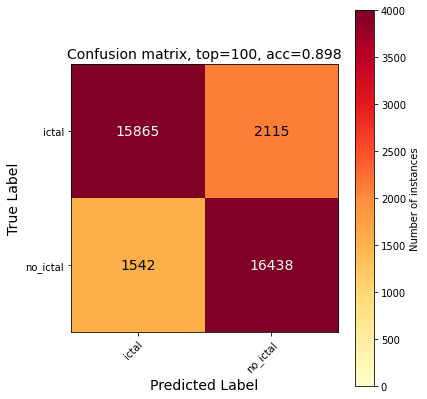

In [4]:
confusion_matrix(base_directory, classes, 100, "knn", "embeddedrandomforest")

Valor asignado a los 6 atributos más relevantes, se usa embeddedrandomforest
como seleccionador de características.
['alpha_FT9-FT10_var', 'theta_P7-T7_std', 'theta_T8-P8_rms', 'beta_FT9-FT10_var', 'beta_T7-P7_var', 'beta_C3-P3_std']


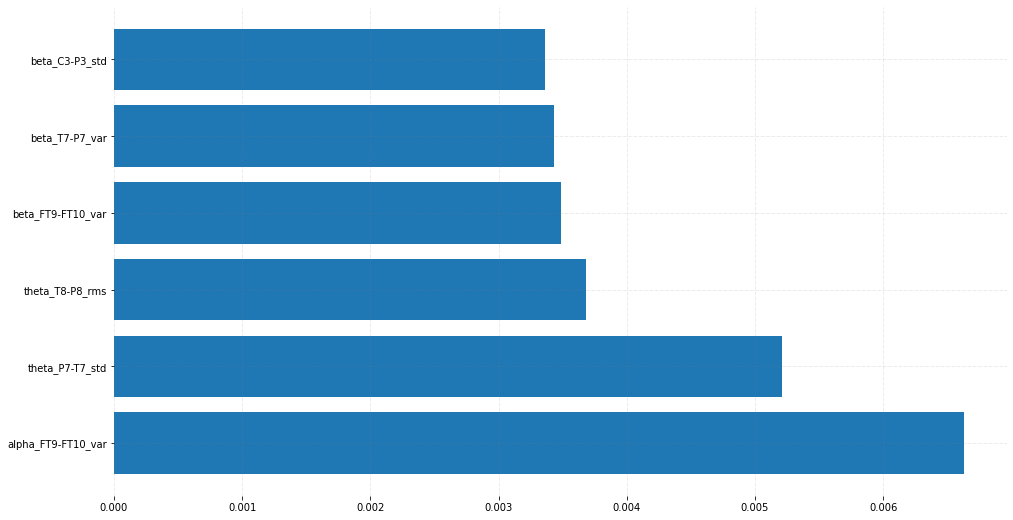

In [5]:
fs_model = "embeddedrandomforest"
ml_model = "forest"
num_features = 6
print(f"Valor asignado a los {num_features} atributos más relevantes, se usa {fs_model}\n"\
"como seleccionador de características.")
features_map = get_json_content(features_map_file)
get_top_chart(base_directory, features_map, num_features, ml_model, fs_model)

Desempeño al usar los X atributos más importantes. Se usa shap como clasificador
y svm como seleccionador de características.


<Figure size 864x504 with 0 Axes>

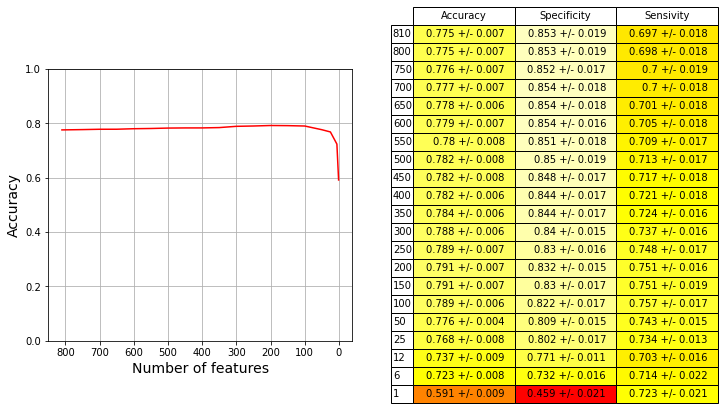

In [4]:
fs_model = "shap"
classifier = "svm"

print(f"Desempeño al usar los X atributos más importantes. Se usa {fs_model} como clasificador\n"
f"y {classifier} como seleccionador de características.")
get_feature_elimination_chart(base_directory, classifier,fs_model)

Desempeño para diferente cantidad de atributos y métodos de selección de características.
Se usa ['tree', 'svm', 'ann', 'forest', 'knn'] como clasificador.


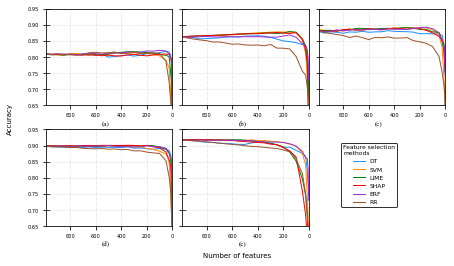

In [7]:
classifiers = ["tree", "svm", "ann", "forest", "knn"]
print("Desempeño para diferente cantidad de atributos y métodos de selección de características.\n"\
f"Se usa {classifiers} como clasificador.")
get_rfe_comparison_chart(base_directory, classifiers,
                         ["tree", "svm", "lime", "shap", "embeddedrandomforest", "reciprocalranking"],
                        "../Images/AccuracyOverFeatures.png")

Precisión obtenida mediante las diversas combinaciones de modelos clasificadores
y seleccionadores de características. Se usa el top [500, 25, 12, 6] de atributos.


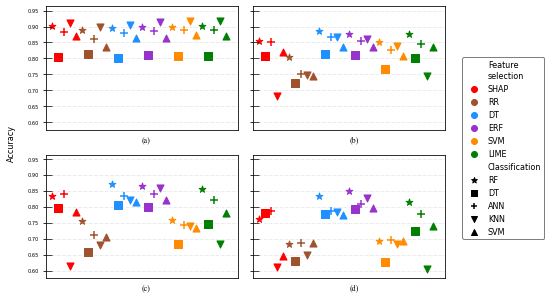

In [3]:
features_slices = [500, 25, 12, 6]
print("Precisión obtenida mediante las diversas combinaciones de modelos clasificadores\n"\
f"y seleccionadores de características. Se usa el top {features_slices} de atributos.")
get_accuracy_distribution(base_directory, features_slices, save="../Images/AccuracyComp.png")

Comparación entre modelos de selección de características; se muestra el ranking de Friedman,
que es el ranking (de acuerdo al performance) promedio del modelo seleccionador
al usar diversos clasificadores y los [500, 25, 12, 6] atributos más importantes. En el
otro eje se muestra la desviación estándar del ranking.


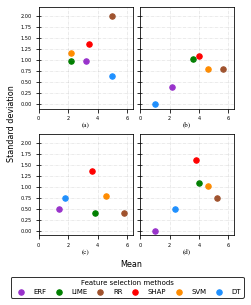

In [4]:
features_slices = [500, 25, 12, 6]

print(f"Comparación entre modelos de selección de características; se muestra el ranking de Friedman,\n"
"que es el ranking (de acuerdo al performance) promedio del modelo seleccionador\n"\
f"al usar diversos clasificadores y los {features_slices} atributos más importantes. En el\n"\
"otro eje se muestra la desviación estándar del ranking.")
get_friedman_chart(base_directory, features_slices, save="../Images/FriedmanChart.png")

Comparación de los [500, 25, 12, 6] atributos de mayor importancia de acuerdo con cada
modelo seleccionador de características. La similitud se calcula mediante el índice de Jaccard.


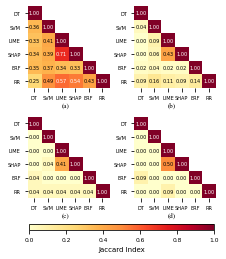

In [6]:
features_slices = [500, 25, 12, 6]
print(f"Comparación de los {features_slices} atributos de mayor importancia de acuerdo con cada\n"\
"modelo seleccionador de características. La similitud se calcula mediante el índice de Jaccard.")
features_map = get_json_content(features_map_file)
get_jaccard_matrix(base_directory, features_map, features_slices, "svm",
                   ["tree", "svm", "lime", "shap", "embeddedrandomforest",
                    "reciprocalranking"], save="../Images/JaccardIndexSvm.png")

Comparación de los [500, 25, 12, 6] atributos de mayor importancia de acuerdo con cada
modelo seleccionador de características. La similitud se calcula mediante el índice de Jaccard.


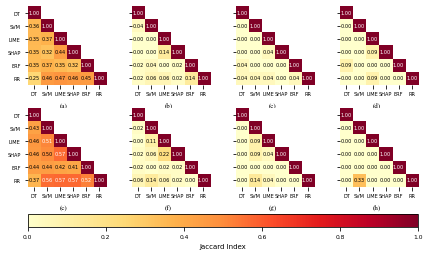

In [11]:
features_slices = [500, 25, 12, 6]
print(f"Comparación de los {features_slices} atributos de mayor importancia de acuerdo con cada\n"\
"modelo seleccionador de características. La similitud se calcula mediante el índice de Jaccard.")
features_map = get_json_content(features_map_file)
get_jaccard_matrix_chb_vs_siena("../MLData/", "../MLDataSienna/", features_map, features_slices, "knn",
                               ["tree", "svm", "lime", "shap", "embeddedrandomforest",
                                "reciprocalranking"], save="../Images/JaccardIndexKnn.png")

In [133]:
classification_method = "knn"
best_fsm = "embeddedrandomforest"
num_features = "6"
compare_with = "reciprocalranking"

execute_test_5x2_ftest(base_directory, classification_method, best_fsm, compare_with, num_features)

Score diffs= [0.18715239154616237, 0.1738042269187987, 0.16907675194660732, 0.171579532814238, 0.1946607341490545, 0.18103448275862077, 0.17408231368186877, 0.1815906562847609, 0.1799221357063403, 0.17797552836484987]
F-stat= 746.6214953271115 p-value= 2.7130745911206723e-07
